In [192]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import datetime as dt
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import correlate
import plotly.graph_objects as go
import statsmodels.api as sm

In [193]:
os.chdir('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\Rental_Fleet_Demand_Forecast\data\station_level\outflow_data')

UnmetDemand_df_station_lvl = pd.read_parquet('UnmetDemand_df_station_level.parquet')

# identify if any time series is all 0
for c in UnmetDemand_df_station_lvl.columns:
    if UnmetDemand_df_station_lvl[c].nunique() == 1:
        print('station with all zeros: ',c)

UnmetDemand_df_station_lvl.index.name = 'datetime'
UnmetDemand_df_station_lvl

,4,5,6,7,8,9,10,11,12,13,...,380,381,382,383,384,385,386,387,388,389
datetime,,,,,,,,,,,,,,,,,,,,,
2021-09-24 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-09-24 01:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-09-24 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-09-24 03:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-09-24 04:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23 15:00:00,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2021-12-23 16:00:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-12-23 17:00:00,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [194]:
# sum over all the stations at every time
UnmetDemand_df_country_lvl = pd.DataFrame(UnmetDemand_df_station_lvl.sum(axis=1),columns=['country_unmet_demand'])
UnmetDemand_df_country_lvl

,country_unmet_demand
datetime,
2021-09-24 00:00:00,6
2021-09-24 01:00:00,4
2021-09-24 02:00:00,8
2021-09-24 03:00:00,2
2021-09-24 04:00:00,4
...,...
2021-12-23 15:00:00,30
2021-12-23 16:00:00,27
2021-12-23 17:00:00,15


In [195]:
# profile = ProfileReport(UnmetDemand_df_country_lvl, tsmode=True, sortby="datetime")
# os.chdir('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\Rental_Fleet_Demand_Forecast\docs\\read_me\pandas_data_profile\country_level')
# profile.to_file('country_unmet_demand_profile_report.html')

In [196]:
os.chdir('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\Rental_Fleet_Demand_Forecast\data\station_level\outflow_data')
MetDemand_df_station_lvl = pd.read_csv("station_outflow_60_0.01_('2021-09-24', 0)_to_('2021-12-23', 19).csv")
MetDemand_df_station_lvl

,4,5,6,7,8,9,10,11,12,13,...,380,381,382,383,384,385,386,387,388,389
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,1.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2176,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2177,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2178,0.0,2.0,1.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


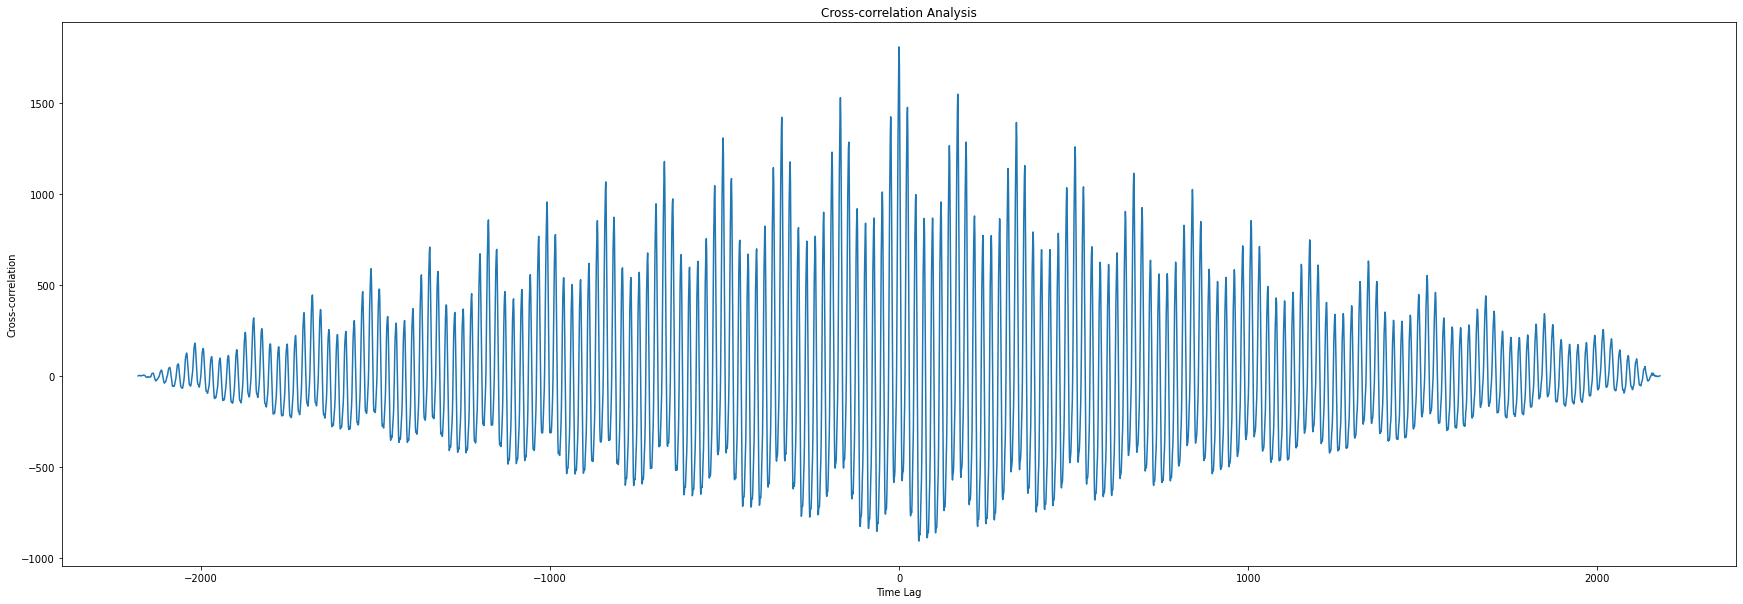

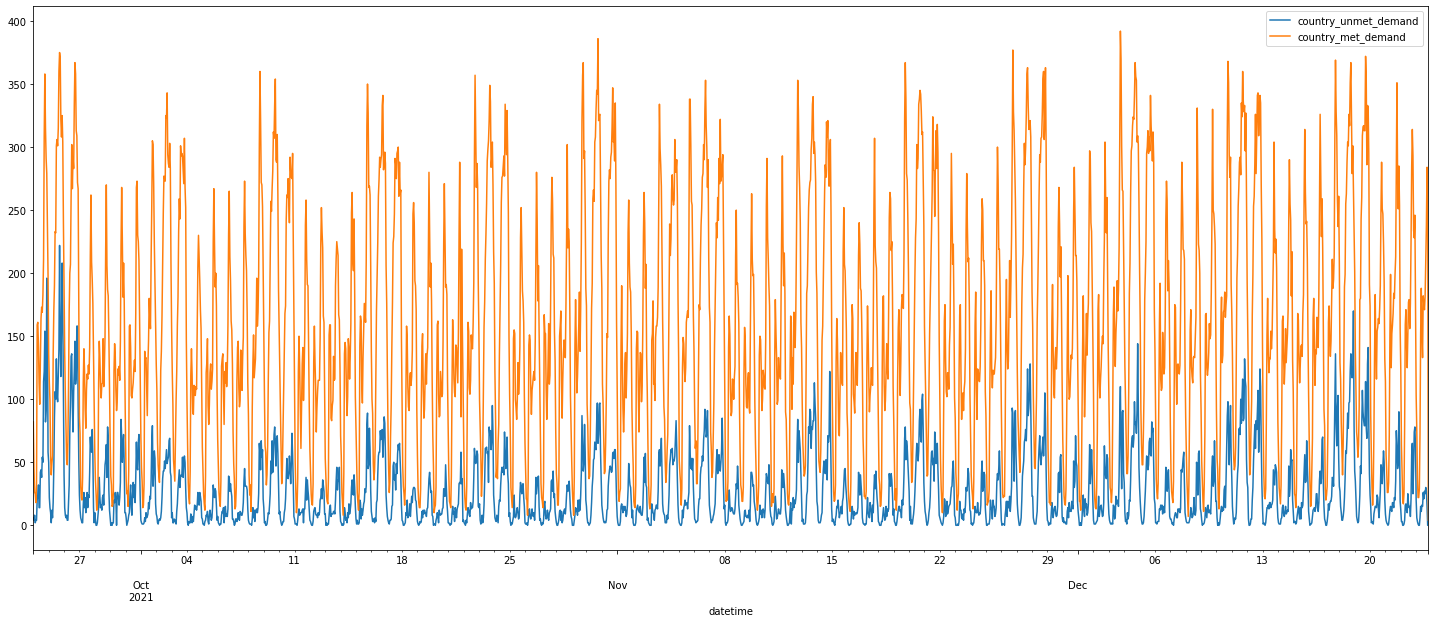

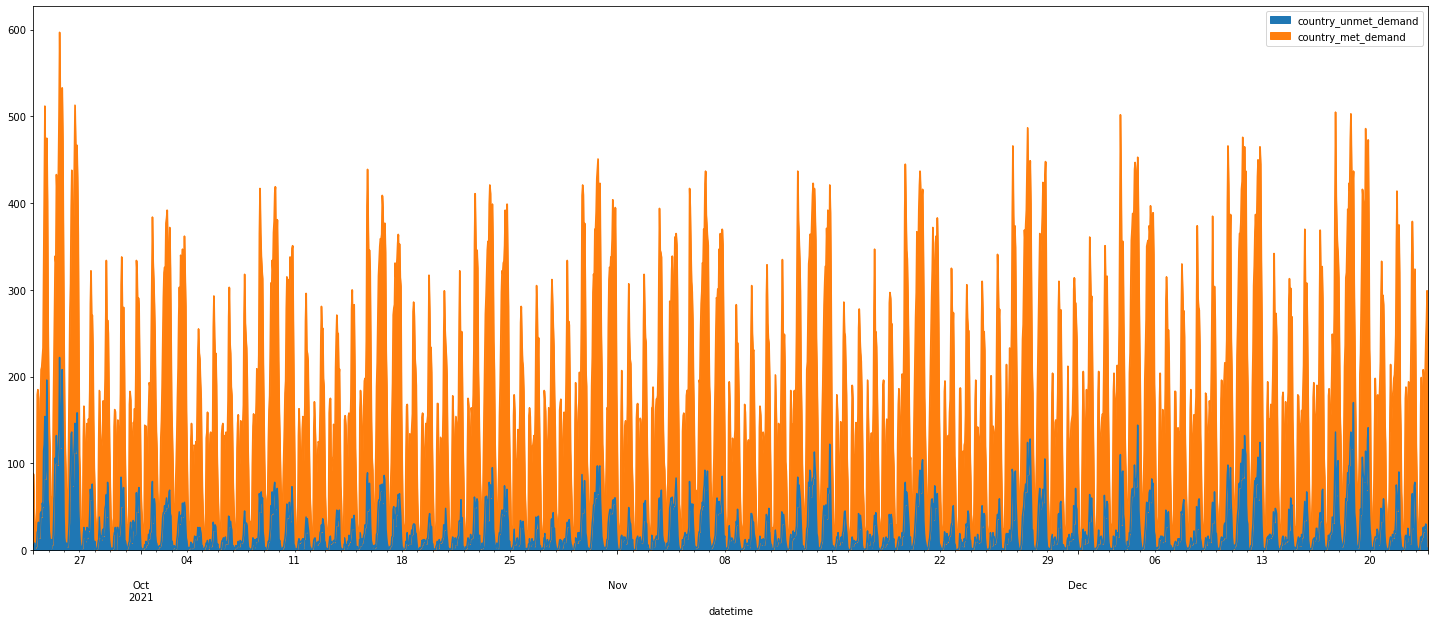

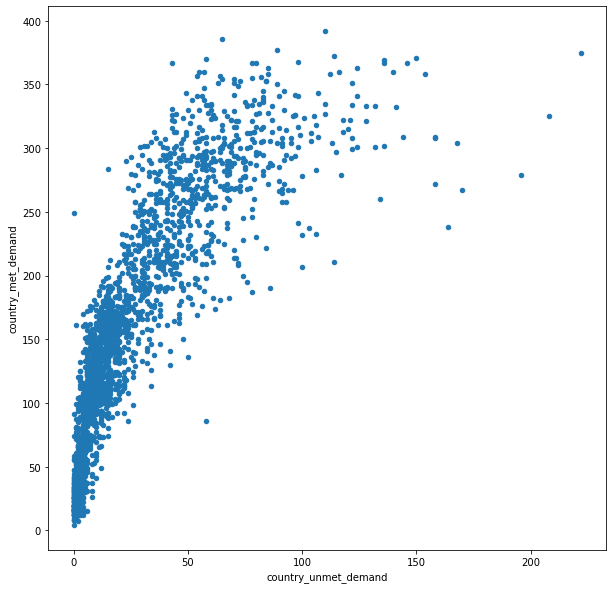

In [197]:
""" compare to met demand at country level to check that it is really overflowing demand and not due to the
# person cancelling"""

# sum over all the stations at every time and generate report
MetDemand_df_country_lvl = pd.DataFrame(MetDemand_df_station_lvl.sum(axis=1),columns=['country_met_demand'])
MetDemand_df_country_lvl.index.name = 'datetime'
MetDemand_df_country_lvl
# profile = ProfileReport(MetDemand_df_country_lvl, tsmode=True, sortby="datetime")
# os.chdir('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\Rental_Fleet_Demand_Forecast\docs\\read_me\pandas_data_profile\country_level')
# profile.to_file('country_met_demand_profile_report.html')


""" check cross correlation and ensure that lags close to zero have
highest correlation"""
series1 = MetDemand_df_country_lvl.country_met_demand.values
series2 = UnmetDemand_df_country_lvl.country_unmet_demand.values
# Normalize the series to have zero mean and unit variance
normalized_series1 = (series1 - np.mean(series1)) / np.std(series1)
normalized_series2 = (series2 - np.mean(series2)) / np.std(series2)
# Perform cross-correlation analysis
cross_corr = correlate(normalized_series1, normalized_series2)
# Determine the time lags
left_range = -500
right_range = 500
time_lags = np.arange(+1 + left_range, right_range)
# Plot the cross-correlation function in a specified range of time lags
fig = go.Figure(data=go.Scatter(x=time_lags, y=cross_corr[len(series1)+left_range:len(series1)+right_range-1]))
fig.update_layout(
    title="Cross-correlation Analysis",
    xaxis_title="Time Lag",
    yaxis_title="Cross-correlation",
)
fig.show()
# plot full cross correlation plot
plt.figure(figsize=(30,10))
plt.plot(np.arange(-len(series1)+1, len(series1)), cross_corr)
plt.xlabel('Time Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation Analysis')
plt.show()


# plot a scatter plot of peak times from met and unmet demand time series
# check that the line is 45 degrees
compare_met_unmet_demand_df = pd.DataFrame({ 'country_unmet_demand':UnmetDemand_df_country_lvl.country_unmet_demand.values,'country_met_demand':MetDemand_df_country_lvl.country_met_demand.values}, index=UnmetDemand_df_country_lvl.index)

# Plot all columns
compare_met_unmet_demand_df.plot(figsize=(25,10))
plt.show()
# Area plot
compare_met_unmet_demand_df.plot.area(figsize=(25,10))
plt.show()
# Scatter plot
compare_met_unmet_demand_df.plot.scatter(x='country_unmet_demand', y='country_met_demand',figsize=(10,10))
plt.show()




In [198]:
""" FFT and IFFT to identify the significant periods in UNMET demand"""

# Perform the FFT on the data
fft_result = np.fft.fft(compare_met_unmet_demand_df.country_unmet_demand.values)
# Compute the magnitudes of the FFT result
fft_magnitudes = np.abs(fft_result)
# Generate the corresponding frequency axis
sampling_rate = 1.0  # Assuming a sampling rate of 1.0 (change as needed)
frequency_axis = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)
positive_freq_indices = np.where(frequency_axis >= 0)
# Plot the FFT result versus frequency
fig = go.Figure(data=go.Scatter(x=frequency_axis[positive_freq_indices], y=fft_magnitudes[positive_freq_indices],mode='lines+markers'))
fig.update_layout(
    title='FFT Result versus Frequency (unmet demand)',
    xaxis_title="Frequency",
    yaxis_title="Magnitude",
    autosize=False,
    width=1000,
    height=800,
)
fig.show()



top_freq = 8
# Compute the magnitudes of the FFT result
fft_magnitudes = np.abs(fft_result)
# Sort the magnitudes in descending order and get the corresponding indices
sorted_indices = np.argsort(fft_magnitudes)[::-1]
# Retrieve the indices of the top frequencies
top_frequencies_indices = sorted_indices[:top_freq]
# Create a new array with only the top 10 frequencies, set the rest to zero
modified_fft_result = np.zeros_like(fft_result)
modified_fft_result[top_frequencies_indices] = fft_result[top_frequencies_indices]
# Perform the IFFT on the modified array
ifft_result = np.fft.ifft(modified_fft_result)
# Plot the resulting time series
fig = go.Figure(data=go.Scatter(x=compare_met_unmet_demand_df.index, y=np.abs(ifft_result),mode='lines+markers'))
fig.update_layout(
    title='IFFT using Top '+ str(top_freq)  +' Frequencies (unmet demand)',
    xaxis_title="Time",
    yaxis_title="Amplitude",
    autosize=False,
    width=1000,
    height=800,
)
fig.show()

""" TOP 8 periods/frequencies in the time series"""
# Sort the magnitudes and frequencies in descending order
sorted_indices = np.argsort(fft_magnitudes[positive_freq_indices])[::-1]
sorted_magnitudes = fft_magnitudes[positive_freq_indices][sorted_indices]
sorted_frequencies = frequency_axis[positive_freq_indices][sorted_indices]
# Select the top 8 periods
top_12_periods = sorted_frequencies[:12]
print(f'Top FFT periods in unmet demand are : {1/top_12_periods}')


compare_met_unmet_demand_df['ifft_unmet_demand'] = np.abs(ifft_result)


Top FFT periods in unmet demand are : [          inf   23.95604396  167.69230769   11.97802198   83.84615385
   20.96153846   27.94871795 2180.           23.69565217 1090.
   12.0441989     4.80176211]


In [199]:
""" FFT and IFFT to identify the significant periods in MET demand"""

# Perform the FFT on the data
fft_result = np.fft.fft(compare_met_unmet_demand_df.country_met_demand.values)
# Compute the magnitudes of the FFT result
fft_magnitudes = np.abs(fft_result)
# Generate the corresponding frequency axis
sampling_rate = 1.0  # Assuming a sampling rate of 1.0 (change as needed)
frequency_axis = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)
positive_freq_indices = np.where(frequency_axis >= 0)
# Plot the FFT result versus frequency
fig = go.Figure(data=go.Scatter(x=frequency_axis[positive_freq_indices], y=fft_magnitudes[positive_freq_indices],mode='lines+markers'))
fig.update_layout(
    title='FFT Result versus Frequency (met demand)',
    xaxis_title="Frequency",
    yaxis_title="Magnitude",
    autosize=False,
    width=1000,
    height=800,
)
fig.show()


top_freq = 8
# Compute the magnitudes of the FFT result
fft_magnitudes = np.abs(fft_result)
# Sort the magnitudes in descending order and get the corresponding indices
sorted_indices = np.argsort(fft_magnitudes)[::-1]
# Retrieve the indices of the top frequencies
top_frequencies_indices = sorted_indices[:top_freq]
# Create a new array with only the top 10 frequencies, set the rest to zero
modified_fft_result = np.zeros_like(fft_result)
modified_fft_result[top_frequencies_indices] = fft_result[top_frequencies_indices]
# Perform the IFFT on the modified array
ifft_result = np.fft.ifft(modified_fft_result)
# Plot the resulting time series
fig = go.Figure(data=go.Scatter(x=compare_met_unmet_demand_df.index, y=np.abs(ifft_result),mode='lines+markers'))
fig.update_layout(
    title='IFFT using Top '+ str(top_freq)  +' Frequencies (met demand)',
    xaxis_title="Time",
    yaxis_title="Amplitude",
    autosize=False,
    width=1000,
    height=800,
)
fig.show()


""" TOP 8 periods/frequencies in the time series"""
# Sort the magnitudes and frequencies in descending order
sorted_indices = np.argsort(fft_magnitudes[positive_freq_indices])[::-1]
sorted_magnitudes = fft_magnitudes[positive_freq_indices][sorted_indices]
sorted_frequencies = frequency_axis[positive_freq_indices][sorted_indices]
# Select the top 8 periods
top_periods = sorted_frequencies[:12]
print(f'Top FFT periods in met demand are : {1/top_periods}')


compare_met_unmet_demand_df['ifft_met_demand'] = np.abs(ifft_result)



Top FFT periods in met demand are : [         inf  23.95604396 167.69230769  11.97802198  12.0441989
  83.84615385  24.22222222  20.96153846  27.94871795   4.80176211
  23.69565217   6.00550964]


In [200]:
""" Summing the met and unmet demands together"""

compare_met_unmet_demand_df['country_total_demand'] = compare_met_unmet_demand_df.country_unmet_demand.values + compare_met_unmet_demand_df.country_met_demand.values
compare_met_unmet_demand_df.country_total_demand

profile = ProfileReport(compare_met_unmet_demand_df, tsmode=True, sortby="datetime")
os.chdir('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\Rental_Fleet_Demand_Forecast\docs\\read_me\pandas_data_profile\country_level')
profile.to_file('country_met_unmet_total_demand_profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [201]:
""" FFT and IFFT to identify the significant periods in TOTAL demand"""

# Perform the FFT on the data
fft_result = np.fft.fft(compare_met_unmet_demand_df.country_total_demand.values)
# Compute the magnitudes of the FFT result
fft_magnitudes = np.abs(fft_result)
# Generate the corresponding frequency axis
sampling_rate = 1.0  # Assuming a sampling rate of 1.0 (change as needed)
frequency_axis = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)
positive_freq_indices = np.where(frequency_axis >= 0)
# Plot the FFT result versus frequency
fig = go.Figure(data=go.Scatter(x=frequency_axis[positive_freq_indices], y=fft_magnitudes[positive_freq_indices],mode='lines+markers'))
fig.update_layout(
    title='FFT Result versus Frequency (TOTAL demand)',
    xaxis_title="Frequency",
    yaxis_title="Magnitude",
    autosize=False,
    width=1000,
    height=800,
)
fig.show()


top_freq = 8
# Compute the magnitudes of the FFT result
fft_magnitudes = np.abs(fft_result)
# Sort the magnitudes in descending order and get the corresponding indices
sorted_indices = np.argsort(fft_magnitudes)[::-1]
# Retrieve the indices of the top frequencies
top_frequencies_indices = sorted_indices[:top_freq]
# Create a new array with only the top 10 frequencies, set the rest to zero
modified_fft_result = np.zeros_like(fft_result)
modified_fft_result[top_frequencies_indices] = fft_result[top_frequencies_indices]
# Perform the IFFT on the modified array
ifft_result = np.fft.ifft(modified_fft_result)
# Plot the resulting time series
fig = go.Figure(data=go.Scatter(x=compare_met_unmet_demand_df.index, y=np.abs(ifft_result),mode='lines+markers'))
fig.update_layout(
    title='IFFT using Top '+ str(top_freq)  +' Frequencies (TOTAL demand)',
    xaxis_title="Time",
    yaxis_title="Amplitude",
    autosize=False,
    width=1000,
    height=800,
)
fig.show()


""" TOP 8 periods/frequencies in the time series"""
# Sort the magnitudes and frequencies in descending order
sorted_indices = np.argsort(fft_magnitudes[positive_freq_indices])[::-1]
sorted_magnitudes = fft_magnitudes[positive_freq_indices][sorted_indices]
sorted_frequencies = frequency_axis[positive_freq_indices][sorted_indices]
# Select the top 8 periods
top_periods = sorted_frequencies[:12]
print(f'Top FFT periods in total demand are : {1/top_periods}')


compare_met_unmet_demand_df['ifft_total_demand'] = np.abs(ifft_result)


Top FFT periods in total demand are : [          inf   23.95604396  167.69230769   11.97802198   83.84615385
   12.0441989    20.96153846   27.94871795   24.22222222   23.69565217
    4.80176211 2180.        ]


In [202]:
""" Export to Tableau for further clustering"""
os.chdir('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\Rental_Fleet_Demand_Forecast\data\country_level\outflow_data')
compare_met_unmet_demand_df.to_csv("Unmet_and_met_Demand_df_country_level.csv")

In [203]:
""" ACF and PACF plot of unmet demand"""

time_series = compare_met_unmet_demand_df.country_unmet_demand.values

# Compute the ACF and PACF using the statsmodels library
acf_values, confint = sm.tsa.stattools.acf(time_series, nlags=len(time_series)//3, alpha=0.05)
pacf_values = sm.tsa.stattools.pacf(time_series, nlags=len(time_series)//7, method='ywm')

# Plot the ACF
fig = go.Figure(data=go.Scatter(x=np.arange(len(acf_values)), y=acf_values,mode='lines+markers'))
fig.add_hline(y=-1.96/np.sqrt(len(time_series)),line_width=3, line_dash="dash", line_color="green")
fig.add_hline(y=1.96/np.sqrt(len(time_series)),line_width=3, line_dash="dash", line_color="green")
fig.update_layout(
    title='Autocorrelation Function (ACF) (unmet demand)',
    xaxis_title="Time Lag",
    yaxis_title="ACF",
    autosize=False,
    width=1000,
    height=800,
)
fig.show()

# Plot the PACF
fig = go.Figure(data=go.Scatter(x=np.arange(len(pacf_values)), y=pacf_values,mode='lines+markers'))
fig.add_hline(y=-1.96/np.sqrt(len(time_series)),line_width=3, line_dash="dash", line_color="green")
fig.add_hline(y=1.96/np.sqrt(len(time_series)),line_width=3, line_dash="dash", line_color="green")
fig.update_layout(
    title='Partial Autocorrelation Function (PACF) (unmet demand)',
    xaxis_title="Time Lag",
    yaxis_title="PACF",
    autosize=False,
    width=1000,
    height=800,
)
fig.show()


In [204]:
""" ACF and PACF plot of met demand"""

# Assuming you have a time series stored in a pandas Series called 'time_series'
time_series = compare_met_unmet_demand_df.country_met_demand.values

# Compute the ACF and PACF using the statsmodels library
acf_values, confint = sm.tsa.stattools.acf(time_series, nlags=len(time_series)//3, alpha=0.05)
pacf_values = sm.tsa.stattools.pacf(time_series, nlags=len(time_series)//7,method='ywm')

# Plot the ACF
fig = go.Figure(data=go.Scatter(x=np.arange(len(acf_values)), y=acf_values,mode='lines+markers'))
fig.add_hline(y=-1.96/np.sqrt(len(time_series)),line_width=3, line_dash="dash", line_color="green")
fig.add_hline(y=1.96/np.sqrt(len(time_series)),line_width=3, line_dash="dash", line_color="green")
fig.update_layout(
    title='Autocorrelation Function (ACF) (met demand)',
    xaxis_title="Time Lag",
    yaxis_title="ACF",
    autosize=False,
    width=1000,
    height=800,
)
fig.show()

# Plot the PACF
fig = go.Figure(data=go.Scatter(x=np.arange(len(pacf_values)), y=pacf_values,mode='lines+markers'))
fig.add_hline(y=-1.96/np.sqrt(len(time_series)),line_width=3, line_dash="dash", line_color="green")
fig.add_hline(y=1.96/np.sqrt(len(time_series)),line_width=3, line_dash="dash", line_color="green")
fig.update_layout(
    title='Partial Autocorrelation Function (PACF) (met demand)',
    xaxis_title="Time Lag",
    yaxis_title="PACF",
    autosize=False,
    width=1000,
    height=800,
)
fig.show()



In [205]:
""" ACF and PACF plot of TOTAL demand"""

# Assuming you have a time series stored in a pandas Series called 'time_series'
time_series = compare_met_unmet_demand_df.country_total_demand.values

# Compute the ACF and PACF using the statsmodels library
acf_values, confint = sm.tsa.stattools.acf(time_series, nlags=len(time_series)//3, alpha=0.05)
pacf_values = sm.tsa.stattools.pacf(time_series, nlags=len(time_series)//7,method='ywm')

# Plot the ACF
fig = go.Figure(data=go.Scatter(x=np.arange(len(acf_values)), y=acf_values,mode='lines+markers'))
fig.add_hline(y=-1.96/np.sqrt(len(time_series)),line_width=3, line_dash="dash", line_color="green")
fig.add_hline(y=1.96/np.sqrt(len(time_series)),line_width=3, line_dash="dash", line_color="green")
fig.update_layout(
    title='Autocorrelation Function (ACF) (TOTAL demand)',
    xaxis_title="Time Lag",
    yaxis_title="ACF",
    autosize=False,
    width=1000,
    height=800,
)
fig.show()

# Plot the PACF
fig = go.Figure(data=go.Scatter(x=np.arange(len(pacf_values)), y=pacf_values,mode='lines+markers'))
fig.add_hline(y=-1.96/np.sqrt(len(time_series)),line_width=3, line_dash="dash", line_color="green")
fig.add_hline(y=1.96/np.sqrt(len(time_series)),line_width=3, line_dash="dash", line_color="green")
fig.update_layout(
    title='Partial Autocorrelation Function (PACF) (TOTAL demand)',
    xaxis_title="Time Lag",
    yaxis_title="PACF",
    autosize=False,
    width=1000,
    height=800,
)
fig.show()
